In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
dataset_train = pd.read_csv('corn.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [30]:
dataset_train.head()

,Date,Close,Open,Hign,Low,Volume,Percent
0,2019年11月8日,377.25,375.25,383.75,372.50,-,0.53%
1,2019年11月7日,375.25,379.25,380.00,373.75,219.15K,-0.92%
2,2019年11月6日,378.75,382.25,385.00,377.50,185.34K,-0.79%
3,2019年11月5日,381.75,383.25,384.75,380.50,157.13K,-0.39%
4,2019年11月4日,383.25,386.75,387.75,383.00,145.37K,-1.54%


In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [32]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

In [33]:
X_train = []
y_train = []
for i in range(60, 2000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
y_train

array([0.11184521, 0.10854176, 0.12175555, ..., 0.60311468, 0.56677678,
       0.59509202])

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [35]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
train_history = regressor.fit(X_train, y_train,validation_split=0.1, epochs=100, batch_size=32, verbose=2)
show_train_history(train_history)

Train on 1746 samples, validate on 194 samples
Epoch 1/100
 - 6s - loss: 0.0083 - accuracy: 5.7274e-04 - val_loss: 0.0211 - val_accuracy: 0.0052
Epoch 2/100
 - 4s - loss: 0.0031 - accuracy: 5.7274e-04 - val_loss: 0.0068 - val_accuracy: 0.0052
Epoch 3/100
 - 4s - loss: 0.0028 - accuracy: 5.7274e-04 - val_loss: 0.0064 - val_accuracy: 0.0052
Epoch 4/100
 - 4s - loss: 0.0024 - accuracy: 5.7274e-04 - val_loss: 0.0066 - val_accuracy: 0.0052
Epoch 5/100
 - 4s - loss: 0.0027 - accuracy: 5.7274e-04 - val_loss: 0.0050 - val_accuracy: 0.0052
Epoch 6/100
 - 4s - loss: 0.0024 - accuracy: 5.7274e-04 - val_loss: 0.0045 - val_accuracy: 0.0052
Epoch 7/100
 - 4s - loss: 0.0021 - accuracy: 5.7274e-04 - val_loss: 0.0075 - val_accuracy: 0.0052
Epoch 8/100
 - 4s - loss: 0.0019 - accuracy: 5.7274e-04 - val_loss: 0.0050 - val_accuracy: 0.0052
Epoch 9/100
 - 4s - loss: 0.0019 - accuracy: 5.7274e-04 - val_loss: 0.0058 - val_accuracy: 0.0052
Epoch 10/100
 - 4s - loss: 0.0016 - accuracy: 5.7274e-04 - val_loss: 0.

KeyError: 'acc'

In [37]:
dataset_test = pd.read_csv('corn1.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [87]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 82):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

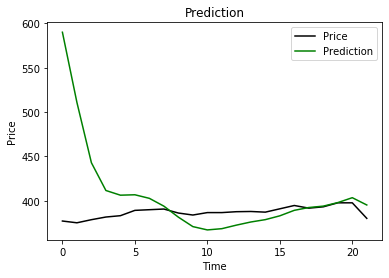

In [93]:
plt.plot(real_stock_price, color = 'black', label = 'Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Prediction')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [89]:
a = []
total = 0
for i in range (len(predicted_stock_price)):
    a.append((real_stock_price[i] - predicted_stock_price[i])/ real_stock_price[i])

In [90]:
b = []
for i in range(len(a)):
    b.append(a[i][0])

In [91]:
b

[-0.5637711815047217,
 -0.3614580839336276,
 -0.16942972617574256,
 -0.07830854514571055,
 -0.06030122143570613,
 -0.04515386347442999,
 -0.03282455053084936,
 -0.00832428935240723,
 0.012020409840210355,
 0.03397226333618164,
 0.050475166779452164,
 0.04685621995192308,
 0.03905581013761283,
 0.03053291556761437,
 0.021796446295997418,
 0.02018374860134271,
 0.013807860864273274,
 -0.0018169546705488193,
 -0.00196957694294342,
 -0.0006448013238529226,
 -0.014534269916719045,
 -0.03963424813034188]

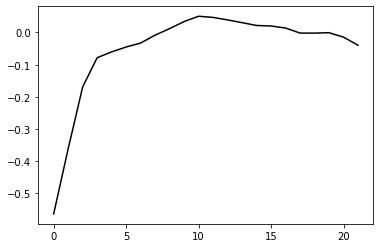

In [92]:
plt.plot(b, color = 'black', label = 'TATA Stock Price')
